# Possible factors for climate change in London

## Introduction

This Project aims to analyze energy consumption and CO2 emissions across London boroughs. By leveraging data from the London Datastore, this report identifies patterns and trends that can inform policy decisions aimed at reducing environmental impacts. The insights derived could be pivotal in shaping future urban and environmental planning strategies to achieve sustainable development goals.


In [7]:
## Install dependencies
import pandas as pd
import io
import requests
from sqlalchemy import create_engine
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [8]:
def load_data(url):
    try:
        response = requests.get(url)
        df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def clean_data(df):
    try:
        df_cleaned = df.dropna()
        return df_cleaned
    except Exception as e:
        print(f"Error cleaning data: {e}")
        return None

## Data Sources

The datasets utilized in this analysis were obtained from the London Datastore, specifically focusing on energy consumption and CO2 emissions across London boroughs. These datasets include annual metrics segmented by borough which allows for detailed temporal and spatial analysis.

- **Structure**: Both datasets are structured in CSV format with columns representing boroughs, years, and respective metrics (energy consumption in MWh and CO2 emissions in metric tons).
- **Licensing**: The data is provided under the UK Open Government Licence, which allows free use, modification, and sharing. The full text of the license can be found at [UK Open Government Licence](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).




In [9]:
urls = [
    "https://data.london.gov.uk/download/leggi/2d6ee3f1-e928-48a9-8eab-01748c65ac6f/energy-consumption-borough-leggi.csv",
    "https://data.london.gov.uk/download/leggi/fcf8a0a3-2051-484a-ba9a-5c8bc2268a3e/co2-emissions-borough-leggi.csv"
]
names = ["energy_consumption", "co2_emissions"]

data_frames = {}
for name, url in zip(names, urls):
    df = load_data(url)
    df_cleaned = clean_data(df)
    data_frames[name] = df_cleaned

## Data Pipeline

The data pipeline is built using Python, leveraging libraries such as Pandas for data manipulation and SQLAlchemy for database operations. The pipeline includes the following steps:

1. **Data Loading**: Data is fetched dynamically from the London Datastore using HTTP requests.
2. **Data Cleaning**: Initial data cleaning focuses on removing rows with missing values to maintain the quality of analysis.
3. **Database Storage**: Cleaned data is stored in a SQLite database for persistence and further analysis.

## Results and Limitations

**Results**:
The initial findings indicate a trend of varying energy consumption and CO2 emissions across different boroughs. Visualizations created in this report illustrate these trends and highlight significant discrepancies between boroughs, suggesting targeted areas for policy intervention.

**Limitations**:
- **Data Completeness**: Some years and boroughs have missing data which could influence the accuracy of trend analysis.
- **Cleaning Method**: The removal of rows with any missing data might result in loss of valuable information where a more nuanced approach to handling missing data could be more appropriate.

**Insights**:
The analysis emphasizes the need for continued monitoring and targeted strategies to reduce emissions in high-impact areas, potentially guiding local authorities in their sustainability initiatives.


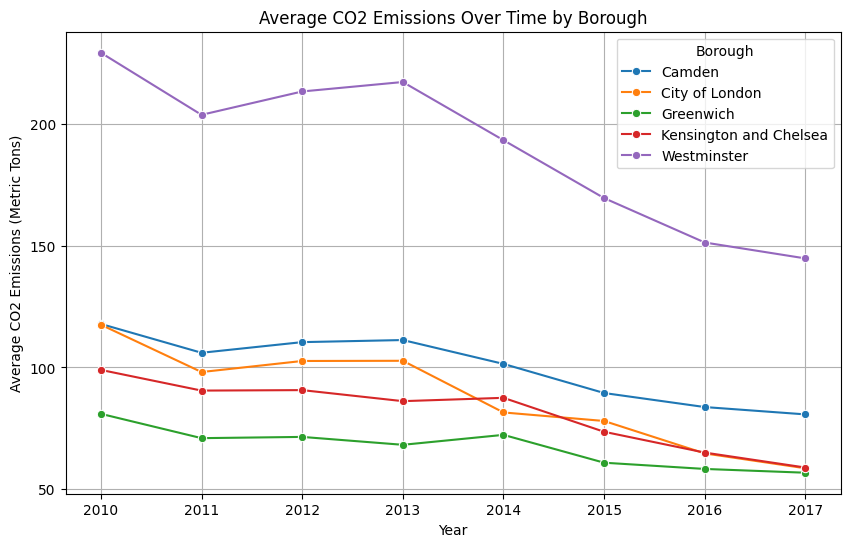

In [10]:
co2_data = data_frames['co2_emissions']
selected_boroughs = ['Camden', 'Westminster', 'Kensington and Chelsea', 'Greenwich', 'City of London']
co2_data.loc[co2_data['Borough'].isin(selected_boroughs), 'KtCO2e'] = pd.to_numeric(co2_data.loc[co2_data['Borough'].isin(selected_boroughs), 'KtCO2e'], errors='coerce')
filtered_data = co2_data[co2_data['Borough'].isin(selected_boroughs)]

average_emissions = filtered_data.groupby(['LEGGI_Year', 'Borough'])['KtCO2e'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=average_emissions, x='LEGGI_Year', y='KtCO2e', hue='Borough', marker='o')
plt.title('Average CO2 Emissions Over Time by Borough')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (Metric Tons)')
plt.legend(title='Borough', loc='upper right')
plt.grid(True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))  # Adjust the locator as needed based on the scale of average emissions
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

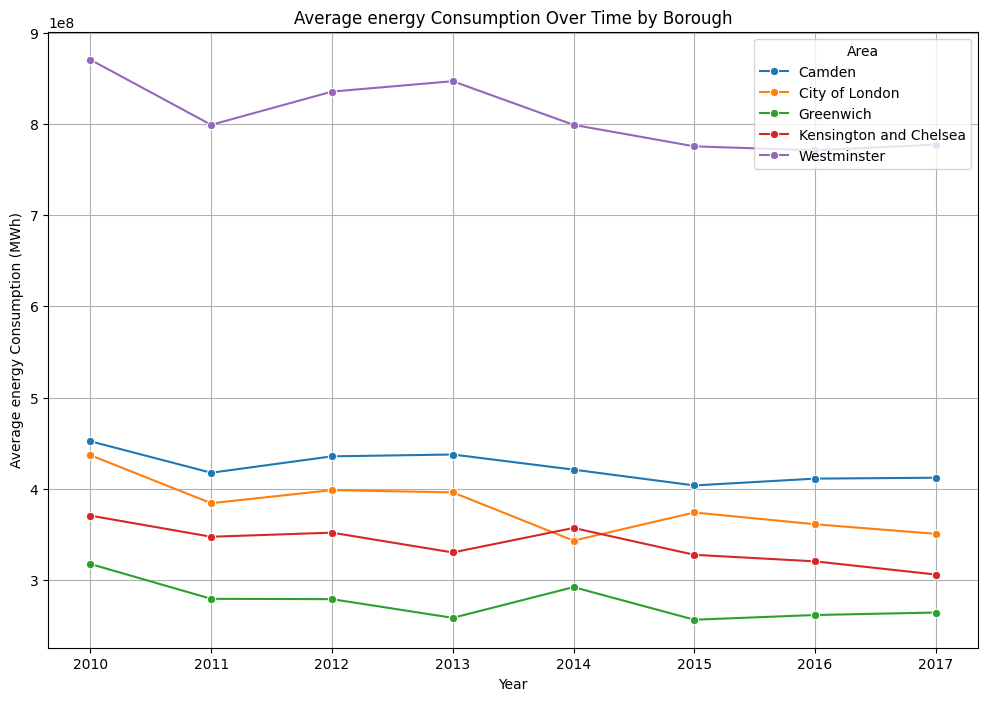

In [11]:
energy_data = data_frames['energy_consumption']
selected_boroughs = ['Camden', 'Westminster', 'Kensington and Chelsea', 'Greenwich', 'City of London']
energy_data.loc[energy_data['Area'].isin(selected_boroughs), 'kWh'] = pd.to_numeric(energy_data.loc[energy_data['Area'].isin(selected_boroughs), 'kWh'], errors='coerce')
filtered_data = energy_data[energy_data['Area'].isin(selected_boroughs)]

average_emissions = filtered_data.groupby(['LEGGI_Year', 'Area'])['kWh'].mean().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=average_emissions, x='LEGGI_Year', y='kWh', hue='Area', marker='o')
plt.title('Average energy Consumption Over Time by Borough')
plt.xlabel('Year')
plt.ylabel('Average energy Consumption (MWh)')
plt.legend(title='Area', loc='upper right')
plt.grid(True)

plt.show()

## Conclusion

This report has provided a detailed overview of energy consumption and CO2 emissions across London boroughs, highlighting key areas for potential improvement and policy development. Moving forward, further analyses with more granular data, as well as consideration of additional variables such as economic factors and population density, could enhance the understanding of emissions dynamics and inform more effective environmental policies.
